# 1.5. BIAS & VARIANCE
## INTRODUCTION
Machine learning is a branch of artificial intelligence that enables machines to learn from data and make predictions. However, machine learning models are not perfect and may make prediction errors due to various reasons. These prediction errors are usually known as bias and variance, and they affect the accuracy and generalization ability of the models.

## BIAS
**Bias is the difference between the expected or true value of a target variable and the predicted value by the model**. Bias measures how much the model’s predictions are off from the reality. Bias is caused by the simplifying assumptions made by the model to make the target function easier to approximate. For example, if the model assumes that the data is linear when it is actually nonlinear, it will introduce bias.

A model with **high bias makes more assumptions and fails to capture the important features and patterns of the data**. This leads to underfitting, which means that the model performs poorly on both the training and testing data. A model with low bias makes fewer assumptions and learns well from the data. This leads to a good fit, which means that the model performs well on the training data but may not generalize well to new data.

## VARIANCE
**Variance is the variability of the model’s predictions for a given data point**. Variance measures how much the model’s predictions change depending on the specific training data used. Variance is caused by the sensitivity of the model to small fluctuations or noise in the training data. For example, if the model fits every single point in the training data, it will have high variance.

A model with **high variance learns too much from the training data and overfits it**. This means that the model performs well on the training data but poorly on new or unseen data. A model with low variance learns less from the training data and does not overfit it. This means that the model performs consistently on both the training and testing data.

## BIAS-VARIANCE TRADE OFF
There is a trade-off between bias and variance in machine learning. 
- A model cannot have both low bias and low variance, as they are inversely related.
- If a model reduces bias, it will increase variance, and vice versa. The goal of machine learning is to find a balance between bias and variance that minimizes the total error.
- The total error of a model can be decomposed into three components: **bias, variance, and irreducible error**. The irreducible error is the error that cannot be reduced by any model, as it is due to unknown or random factors. 
- The total error can be expressed as:
TotalError=Bias<sup>2</sup> + Variance + IrreducibleError
- The **optimal model is the one that has low but not zero bias and low but not zero variance**. This means that the model is complex enough to capture the true relationship between the data points but not too complex to overfit them. The optimal model achieves a good fit that generalizes well to new data.
- The following table summarizes the characteristics of models with different levels of bias and variance:

|Bias|Variance|Model Complexity|Training Error|Testing Error|Generalization|
|-|-|-|-|-|-|
|High|Low|Low|High|High|Poor|
|Low|High|High|Low|High|Poor|
|Low|Low|Moderate|Low|Low|Good|

## HANDSON FOR HANDLING BIAS AND VARIANCE

### 1. DATASET CREATION

In [1]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

### 2. BASIC LINEAR REGRESSION MODEL

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### 3. BIAS VS VARIANCE EVALUATION

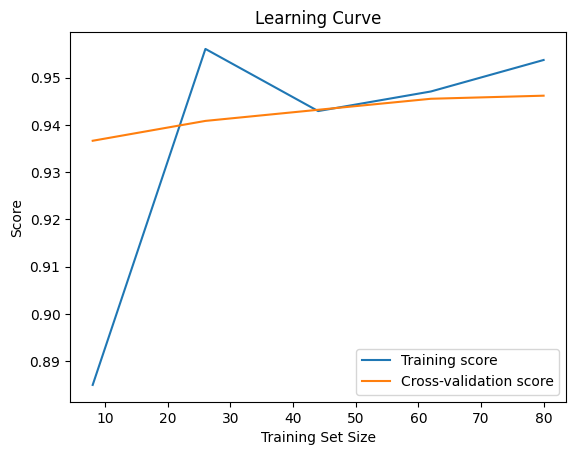

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.show()

### 4. TRAINING vs VALIDATION SCORES

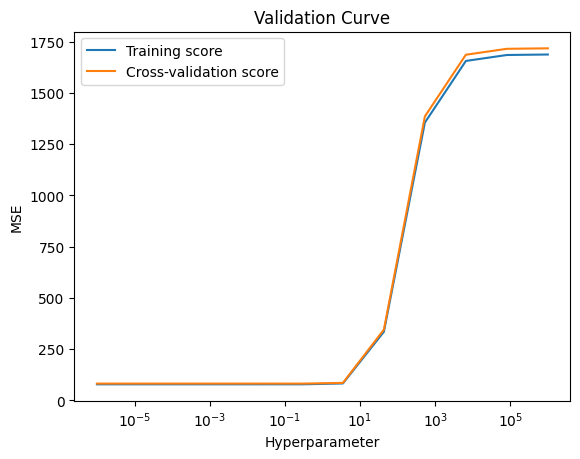

In [5]:
# Validation Curve
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, 6, 12)
train_scores, test_scores = validation_curve(
    Ridge(), X, y, param_name='alpha', param_range=param_range, cv=5, scoring='neg_mean_squared_error'
)
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.semilogx(param_range, train_scores_mean, label='Training score')
plt.semilogx(param_range, test_scores_mean, label='Cross-validation score')
plt.title('Validation Curve')
plt.xlabel('Hyperparameter')
plt.ylabel('MSE')
plt.legend()
plt.show()

## REFERENCES
1. https://www.javatpoint.com/bias-and-variance-in-machine-learning
2. https://www.simplilearn.com/tutorials/machine-learning-tutorial/bias-and-variance
3. https://www.geeksforgeeks.org/bias-vs-variance-in-machine-learning/
4. https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/
5. https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/